In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Instructor/15-Decision-Trees-and-Random-Forests/kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


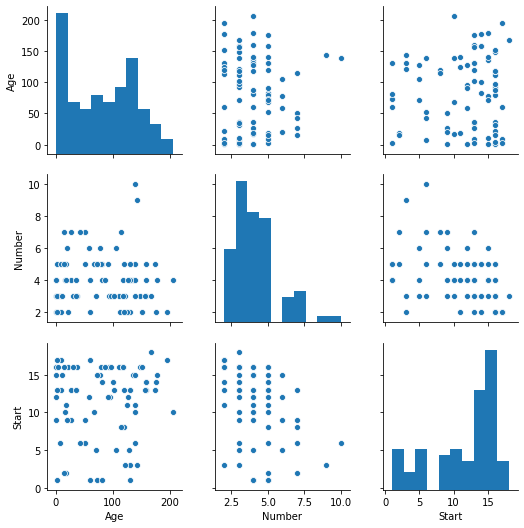

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis=1)
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [9]:
y = df['Kyphosis']
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
pred = dtree.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[14  5]
 [ 6  2]]
              precision    recall  f1-score   support

      absent       0.70      0.74      0.72        19
     present       0.29      0.25      0.27         8

    accuracy                           0.59        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.58      0.59      0.58        27



In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
pred = rfc.predict(X_test)

In [26]:
confusion_matrix(y_test, pred)

array([[19,  0],
       [ 6,  2]])

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        19
     present       1.00      0.25      0.40         8

    accuracy                           0.78        27
   macro avg       0.88      0.62      0.63        27
weighted avg       0.83      0.78      0.73        27



# Tree Visualization

In [31]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [35]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [36]:
dot_data = StringIO()

In [37]:
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

In [38]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

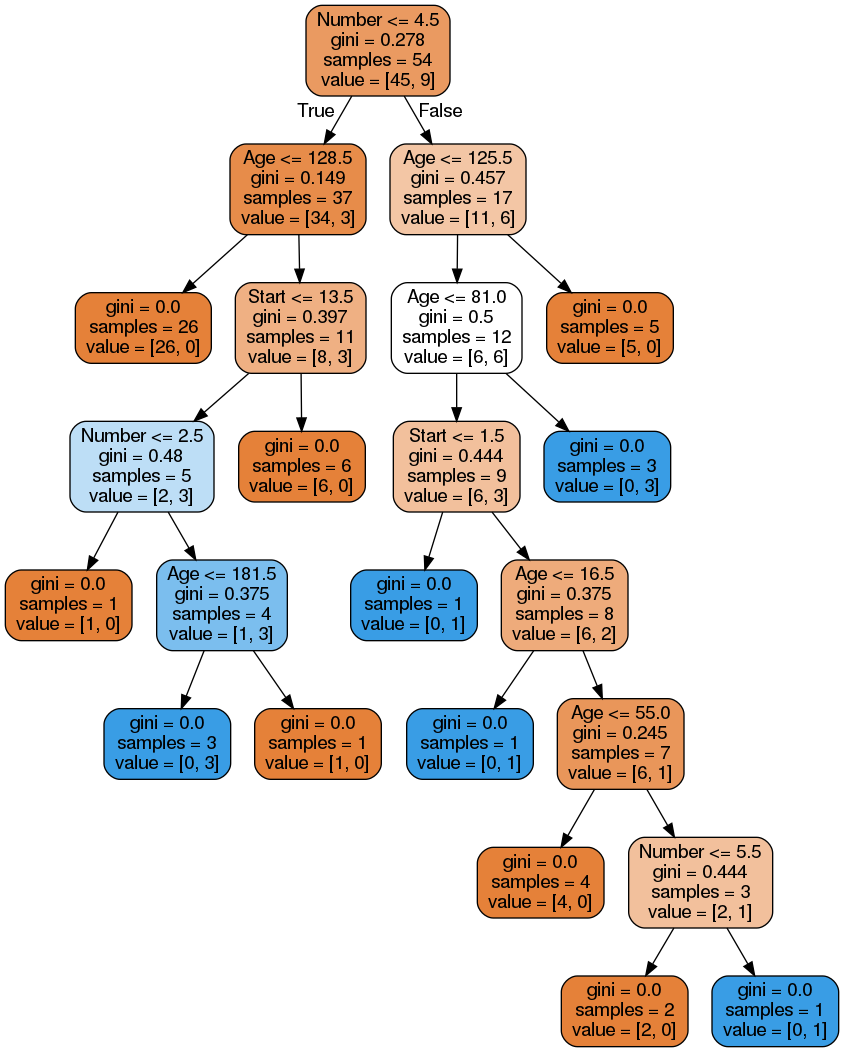

In [39]:
Image(graph[0].create_png())